In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

Краткое описание проекта:
Пет-проект проводит А/B тестирование интернет-магазина, компания желает проверить эффективность
гипотез предложенных маркетинговым отделом.

Цель работы: Анализ эффективности отобранных гипотез компании, воспроизведение их методов отбора,
потверждение или опровержения их статистической значимости

Этапы выполнения работы:
1. Отбор гипотезы:
- Расчет по фреймвору ICE (Impact, Confidence, Effort)
- Расчет по фреймвору RICE (Reach, Impact, Confidence, Effort)
- Определение приоритетной нулевой гипотезы
2. Проведение A/B тестирования:
- Визуализация данных
- Анализ результатов полученных с графиков
- Расчет p-values для оценки статистической значимоси
- Принятие решения по дальнейшей судьбе A/B тестирования

Метрики оценки:
- Выручка
- Общее количество заказов
- Средний чек одного заказа
- Общий чек на одного пользователя 
- Количество посещений
- Количество уникальных пользователей

Имеющиеся данные:
- hypothesis.csv - нулевые гипотезы
- orders.csv - информация по заказам по обоим группам
- visitors.csv -  информация по посещениям

Задачи:
- Отобрать наиболее интересные гипотезы по фреймоврку RICE
- Отобрать наиболее интересные гипотезы по фреймоврку ICE
- Осуществить ранжирование по результатам отбора по RICE и ICE
- Выбрать нулевую гипотезу по которой будет проводиться A/B тестирование
- Построить график распределения посещений по датам
- Построить гистограмму распределения количества посещений по дням
- Построить кумулятивной график выручки и количества заказов
- Построить кумулятивный график темпов роста новых покупателей сделавших первый заказ
- Построить график среднего чека заказа по датам
- Расчитаем средний и средне-медианный чек для группы А и группы B
- Построим заново кумулятивные графики выручки убрав аномалию
- Создать точечную диаграмму общего чека на каждого пользователя
- Считаем общий 95 и 99 процентиль общего чека на каждого пользователя
- Повторяем расчет процентиля отдельно для групп и сравниваем
- Построить гистограмму распределения суммы заказа и количества заказов среди пользователей
- Посчитаем 95 и 99 процентиль по сумме заказа и среднему количеству заказов на одного пользователя
- Тест Манна-Уитни на проверку нулевой гипотезы на все метрики оценки с учетом расчитанных процентилей
- Выводы


In [316]:
orders = pd.read_csv('C:/Users/Max/Desktop/orders.csv')
orders.columns = orders.columns.str.lower()
orders['date'] = pd.to_datetime(orders['date'])
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [317]:
orders.dtypes

transactionid             int64
visitorid                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [318]:
visitors = pd.read_csv('C:/Users/Max/Desktop/visitors.csv')
visitors.columns = visitors.columns.str.lower()
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [319]:
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [320]:
hypothesis = pd.read_csv('C:/Users/Max/Desktop/hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [321]:
hypothesis.dtypes

hypothesis    object
reach          int64
impact         int64
confidence     int64
efforts        int64
dtype: object

In [322]:
hypothesis_lead = pd.DataFrame()
hypothesis_lead['hypothesis'] = hypothesis['hypothesis']
hypothesis_lead['RICE_score'] = hypothesis.reach * hypothesis.confidence * hypothesis.impact/ hypothesis.efforts
hypothesis_lead['RICE_rank'] = hypothesis_lead.RICE_score.rank(ascending = True)
hypothesis_lead = hypothesis_lead.sort_values(by = 'RICE_rank', ascending = False)
hypothesis_lead.head()

,hypothesis,RICE_score,RICE_rank
7,Добавить форму подписки на все основные страни...,112.0,9.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0,8.0
0,"Добавить два новых канала привлечения трафика,...",40.0,6.5
6,Показать на главной странице баннеры с актуаль...,40.0,6.5
8,"Запустить акцию, дающую скидку на товар в день...",16.2,5.0


Вывод наиболее приоритетные гипотезы по RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

In [323]:
hypothesis_lead_ICE = pd.DataFrame()
hypothesis_lead['ICE_score'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis_lead['ICE_rank'] = hypothesis_lead.ICE_score.rank(ascending = True)
hypothesis_lead_ICE = hypothesis_lead.drop(['RICE_score','RICE_rank'], axis = 1)
hypothesis_lead_ICE = hypothesis_lead_ICE.sort_values(by = 'ICE_rank', ascending = False)

hypothesis_lead_ICE.head()

,hypothesis,ICE_score,ICE_rank
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,9.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,8.0
7,Добавить форму подписки на все основные страни...,11.200000,7.0
6,Показать на главной странице баннеры с актуаль...,8.000000,6.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,5.0


Вывод наиболее приоритетные гипотезы по ICE:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [324]:
hypothesis_lead['Average_rank'] = hypothesis_lead.ICE_rank + hypothesis_lead.RICE_rank / 2
hypothesis_lead = hypothesis_lead.sort_values(by = ['Average_rank'], ascending = False)
hypothesis_lead.head()

,hypothesis,RICE_score,RICE_rank,ICE_score,ICE_rank,Average_rank
7,Добавить форму подписки на все основные страни...,112.0,9.0,11.200000,7.0,11.50
8,"Запустить акцию, дающую скидку на товар в день...",16.2,5.0,16.200000,9.0,11.50
0,"Добавить два новых канала привлечения трафика,...",40.0,6.5,13.333333,8.0,11.25
6,Показать на главной странице баннеры с актуаль...,40.0,6.5,8.000000,6.0,9.25
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0,8.0,7.000000,5.0,9.00


Вывод наиболее приоритетная гипотеза по средневзвешеному между RICE и ICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [325]:
hypothesis.iloc[7]

hypothesis    Добавить форму подписки на все основные страни...
reach                                                        10
impact                                                        7
confidence                                                    8
efforts                                                       5
Name: 7, dtype: object

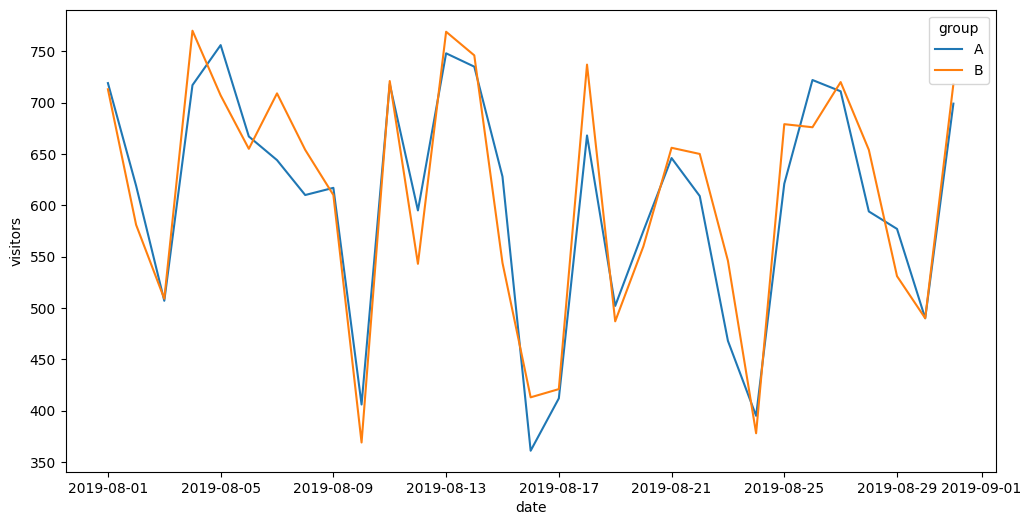

In [326]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=visitors, x="date", y="visitors", hue="group",ax=ax)
ax.tick_params(axis='x', labelsize=10)
plt.show()

Проверка распределения посещений по датам, виден легкий перевес посещений в сторону группы B

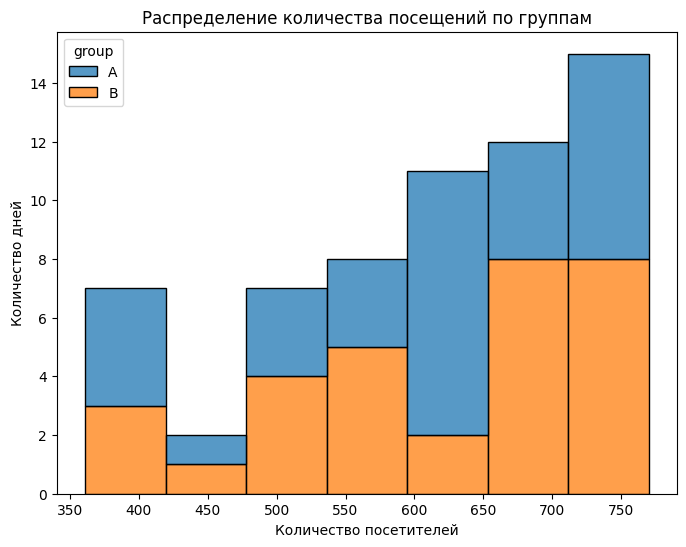

In [327]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=visitors,
             ax = ax,
             x='visitors', 
             hue='group', 
             multiple="stack" # Указывает на создание стековой гистограммы
            )

plt.title('Распределение количества посещений по группам')
plt.xlabel('Количество посетителей')
plt.ylabel('Количество дней')
plt.show()

In [328]:
a = visitors[visitors['group']=='A']
a.visitors.sum()

np.int64(18736)

In [329]:
b = visitors[visitors['group']=='B']
b.visitors.sum()

np.int64(18916)

Проверка на количество посещений по группам A и B показала неравное количество посещений, существует перевес посещений в сторону группы B

In [330]:

first_day_order = orders.groupby(['visitorid','group'], as_index = False).agg({'date': 'min'})
first_day_order = first_day_order.groupby(['date','group'], as_index = False).agg({'visitorid':'nunique'})
first_day_order.head()
first_day_order_a = first_day_order[first_day_order['group'] == 'A']
first_day_order_b = first_day_order[first_day_order['group'] == 'B']
first_day_order_a.head()

,date,group,visitorid
0,2019-08-01,A,20
2,2019-08-02,A,18
4,2019-08-03,A,24
6,2019-08-04,A,15
8,2019-08-05,A,23


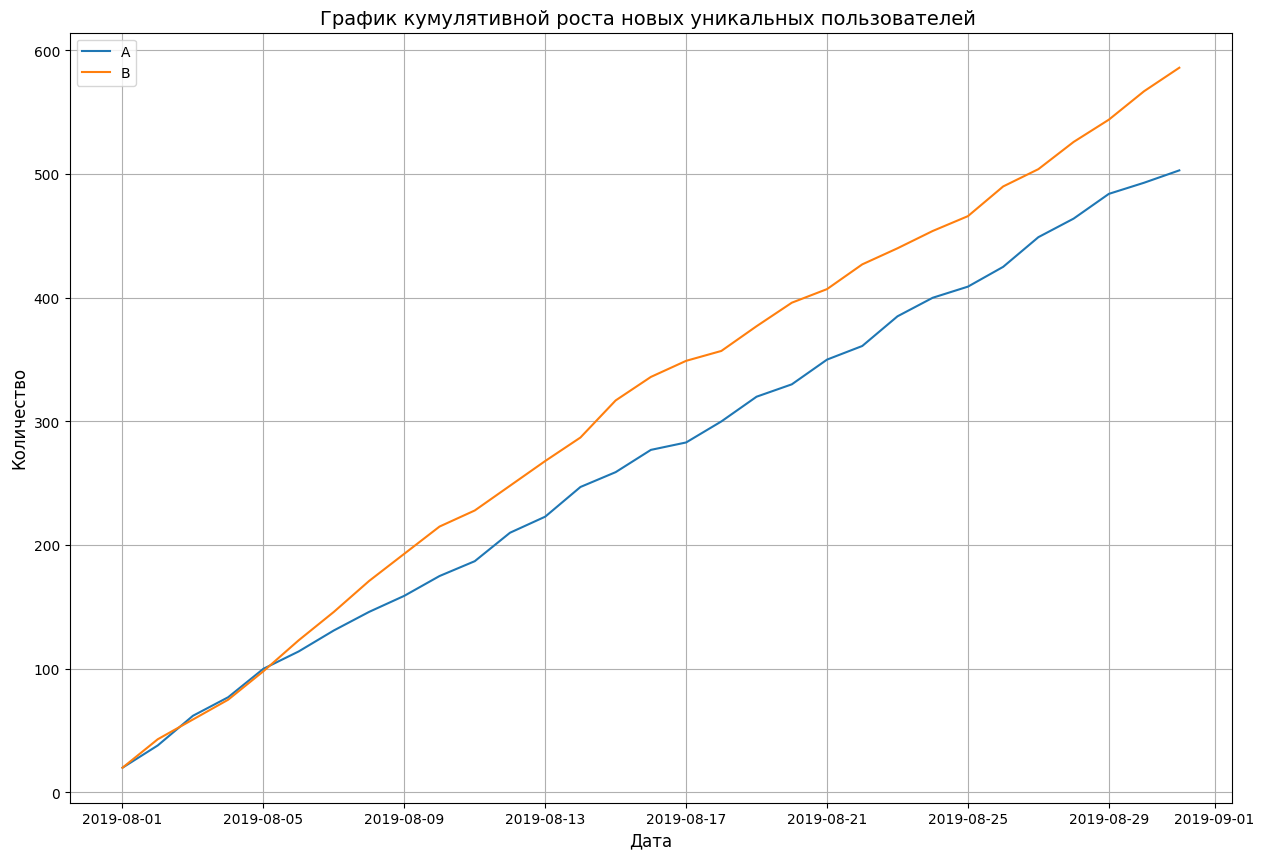

In [331]:
plt.figure(figsize=(15, 10))

plt.plot(first_day_order_a['date'], first_day_order_a.visitorid.cumsum(), label='A')

plt.plot(first_day_order_b['date'], first_day_order_b.visitorid.cumsum(), label='B')

plt.grid(visible=True)
plt.title('График кумулятивной роста новых уникальных пользователей ', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend() 
plt.show()

Диаграмма графика кумулятивной роста новых пользователей совершивших первую покупку показывает что группа B
по темпам рост обходит группу А

In [332]:
orders[orders['group']=='A'].nunique()

transactionid    557
visitorid        503
date              31
revenue          419
group              1
dtype: int64

In [333]:
orders[orders['group']=='B'].nunique()

transactionid    640
visitorid        586
date              31
revenue          450
group              1
dtype: int64

In [334]:
agg_orders_inf = orders.groupby(['visitorid','group'], as_index = False).agg({'transactionid':'count','revenue':'sum'}).sort_values(by = 'transactionid', ascending = False)\
        .rename(columns = {'transactionid':'count_goods','revenue':'users_revenue','visitorid':'users_id'})
agg_orders_inf.head()

,users_id,group,count_goods,users_revenue
1079,4256040402,A,7,48800
619,2458001652,B,6,29289
511,2038680547,A,5,8570
596,2378935119,B,5,79369
618,2458001652,A,5,32809


Агрегируем данные в orders.csv для будущего использовани,теперь мы знаем сколько каждый пользователь заказал товаров и общую сумму им потраченных денег


In [335]:
agg_revenue_date_cumulative = orders.groupby(['date','group']).agg({'revenue':'sum','transactionid':'count'}).sort_values(by=['group', 'date'])\
    .rename(columns={'transactionid':'orders_count'})
agg_revenue_date_cumulative.head()

,,revenue,orders_count
date,group,,
2019-08-01,A,148579,24
2019-08-02,A,93822,20
2019-08-03,A,112473,24
2019-08-04,A,70825,16
2019-08-05,A,124218,25


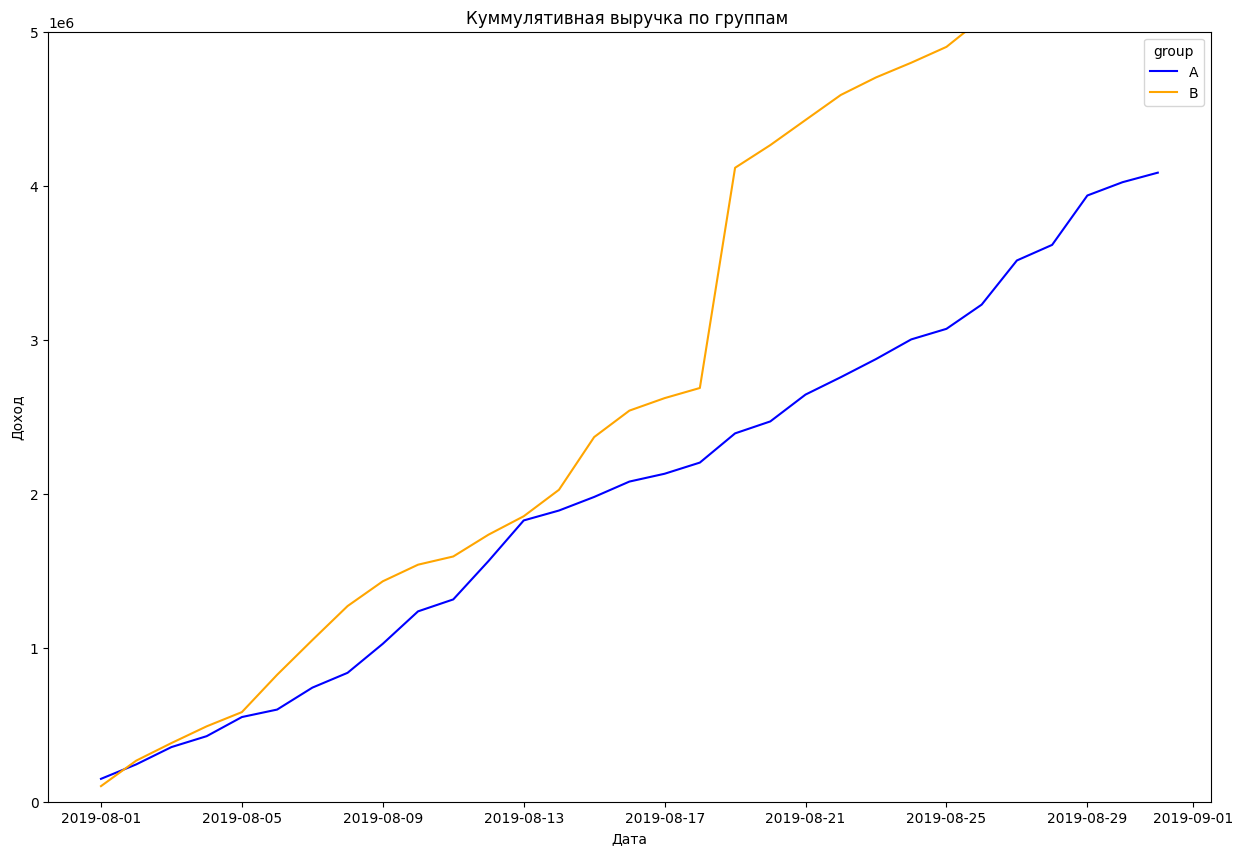

In [336]:
agg_revenue_date_cumulative['cumulative_revenue'] = agg_revenue_date_cumulative.groupby('group')['revenue'].cumsum()

fig, ax = plt.subplots(figsize=(15, 10))
custom_palette = {    "A": "blue",    "B": "orange"
}
sns.lineplot(data=agg_revenue_date_cumulative, x="date", y="cumulative_revenue", hue="group", palette=custom_palette, ax=ax)

ax.tick_params(axis='x', labelsize=10)
plt.ylim(0,5000000)
plt.title("Куммулятивная выручка по группам ")
plt.xlabel("Дата")
plt.ylabel("Доход")

plt.show()

Диаграмма куммулятивной выручки по группам  показывает что темпы роста выручки группы B обгоняют группу A


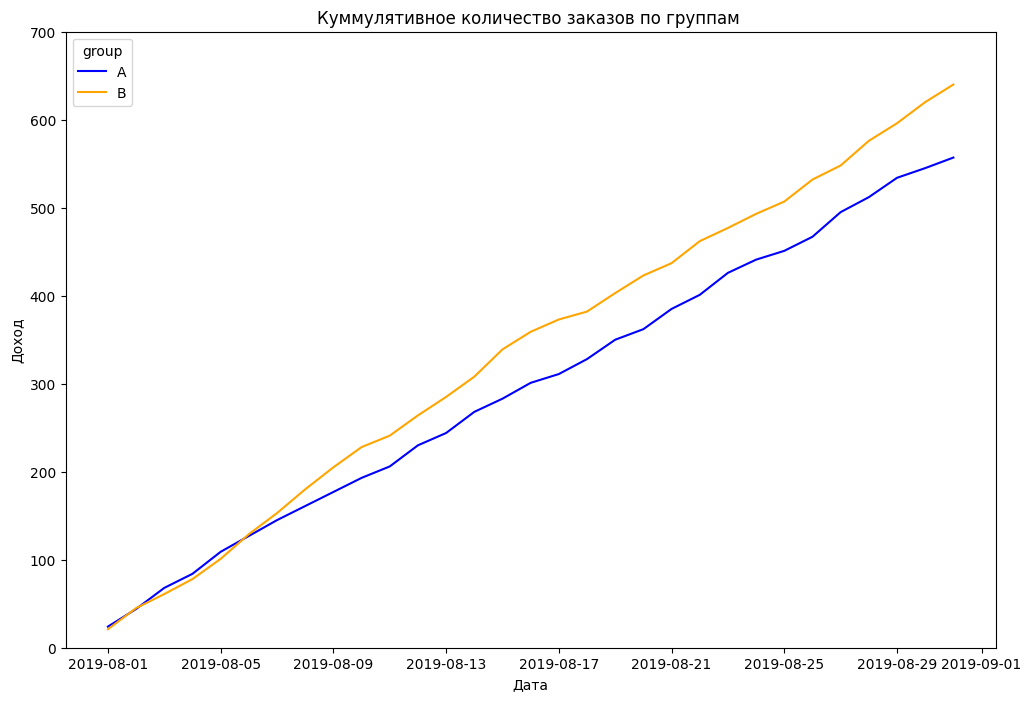

In [337]:
agg_revenue_date_cumulative['cumulative_orders_count'] = agg_revenue_date_cumulative.groupby('group')['orders_count'].cumsum()

fig, ax = plt.subplots(figsize=(12, 8))
custom_palette = {    "A": "blue",    "B": "orange"
}
sns.lineplot(data=agg_revenue_date_cumulative, x="date", y="cumulative_orders_count", hue="group", palette=custom_palette, ax=ax)

ax.tick_params(axis='x', labelsize=10)
plt.ylim(0,700)
plt.title("Куммулятивное количество заказов по группам ")
plt.xlabel("Дата")
plt.ylabel("Доход")

plt.show()

Диаграмма кумулятивного количества заказов группа B активней делала покупки

In [338]:
agg_revenue_date = orders.groupby(['date','group'] ).agg({'revenue':'sum','transactionid':'count'})

agg_revenue_date['average_check'] = agg_revenue_date['revenue'] / agg_revenue_date['transactionid']
agg_revenue_date.head()

revenue  transactionid  average_check
date       group                                       
2019-08-01 A       148579             24    6190.791667
           B       101217             21    4819.857143
2019-08-02 A        93822             20    4691.100000
           B       165531             24    6897.125000
2019-08-03 A       112473             24    4686.375000

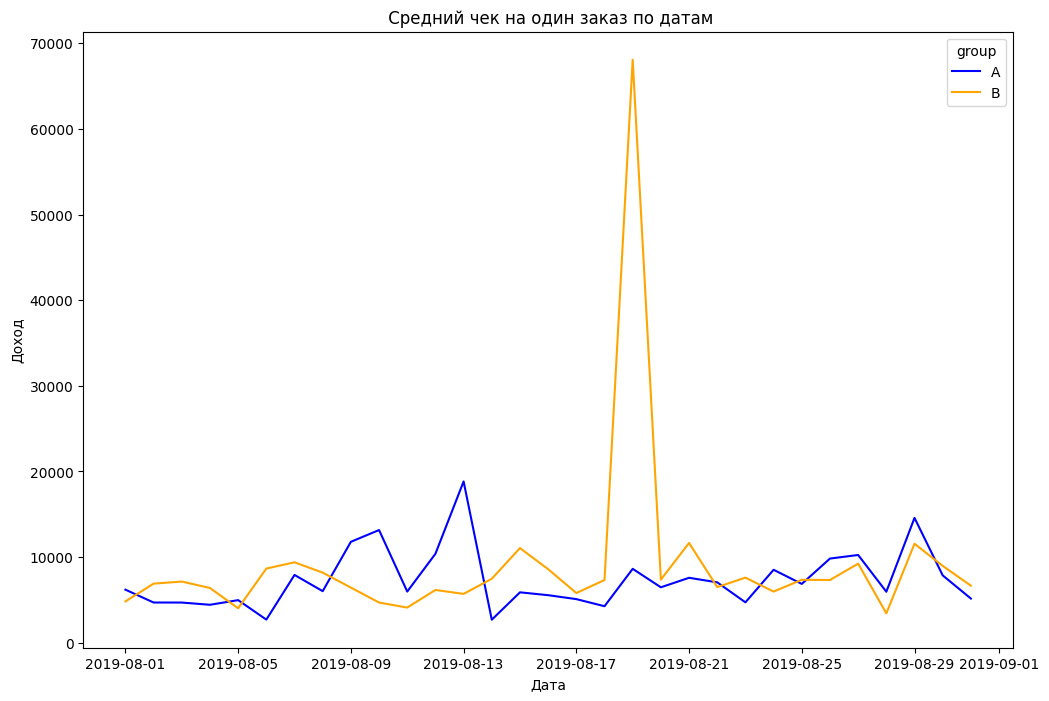

In [339]:
fig, ax = plt.subplots(figsize=(12, 8))
custom_palette = {    "A": "blue",    "B": "orange"
}
sns.lineplot(data=agg_revenue_date, x="date", y="average_check", hue="group", palette=custom_palette, ax=ax)

ax.tick_params(axis='x', labelsize=10)

plt.title(" Средний чек на один заказ по датам")
plt.xlabel("Дата")
plt.ylabel("Доход")

plt.show()

In [340]:
agg_orders_inf.users_revenue.max()

np.int64(1294500)

Аномалию создал один юзер сделавший заказ на общую сумму в 13 млн посмотрим динамику без этого клиента

In [341]:
agg_orders_inf.count_goods.max()

np.int64(7)

В общем количестве заказов на одного пользователя сильнозавышенных значений не обнаружено

In [342]:
agg_orders_inf = orders.groupby(['visitorid','group'], as_index = False).agg({'transactionid':'count','revenue':'sum'}).sort_values(by = 'transactionid', ascending = False)\
        .rename(columns = {'transactionid':'count_goods','revenue':'users_revenue','visitorid':'users_id'})
agg_orders_inf = agg_orders_inf[agg_orders_inf['users_revenue'] <= 210000]
orders = orders[orders['revenue'] <= 210000]

agg_revenue_date = orders.groupby(['date','group'] ,as_index = False).agg({'revenue':'sum','transactionid':'count'})

agg_revenue_date['average_check'] = agg_revenue_date['revenue'] / agg_revenue_date['transactionid']

agg_revenue_date_cumulative = orders.groupby(['date','group']).agg({'revenue':'sum','transactionid':'count'}).sort_values(by=['group', 'date'])\
    .rename(columns={'transactionid':'orders_count'})

In [343]:
orders[orders['group']=='A'].revenue.mean()

np.float64(7333.578096947936)

In [344]:
orders[orders['group']=='B'].revenue.mean()

np.float64(7219.4992175273865)

Средний чек у группы А и B, составил 7333 и 7219 соотвественно, разница составила 114 рублей

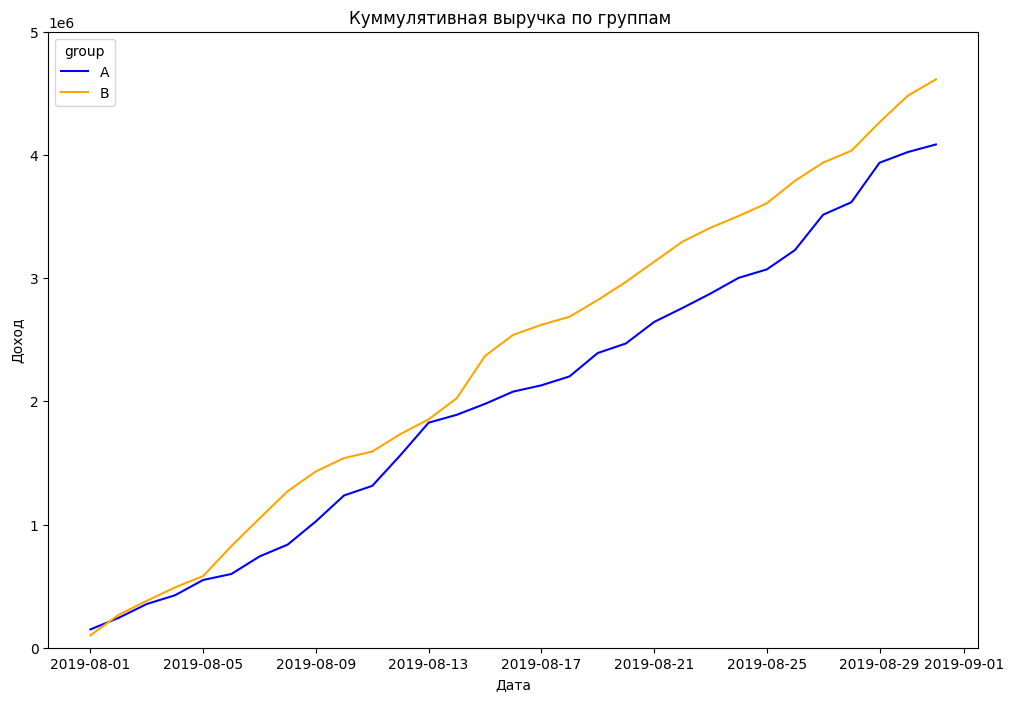

In [345]:
agg_revenue_date_cumulative['cumulative_revenue'] = agg_revenue_date_cumulative.groupby('group')['revenue'].cumsum()

fig, ax = plt.subplots(figsize=(12, 8))
custom_palette = {    "A": "blue",    "B": "orange"
}
sns.lineplot(data=agg_revenue_date_cumulative, x="date", y="cumulative_revenue", hue="group", palette=custom_palette, ax=ax)

ax.tick_params(axis='x', labelsize=10)
plt.ylim(0,5000000)
plt.title("Куммулятивная выручка по группам ")
plt.xlabel("Дата")
plt.ylabel("Доход")

plt.show()

Диаграмма куммулятивной выручки по группам  сохранила результат,темпы роста выручки группы B обгоняют группу A

Text(0.5, 1.0, 'Точечная диаграмма по общей сумме заказов среди пользователей')

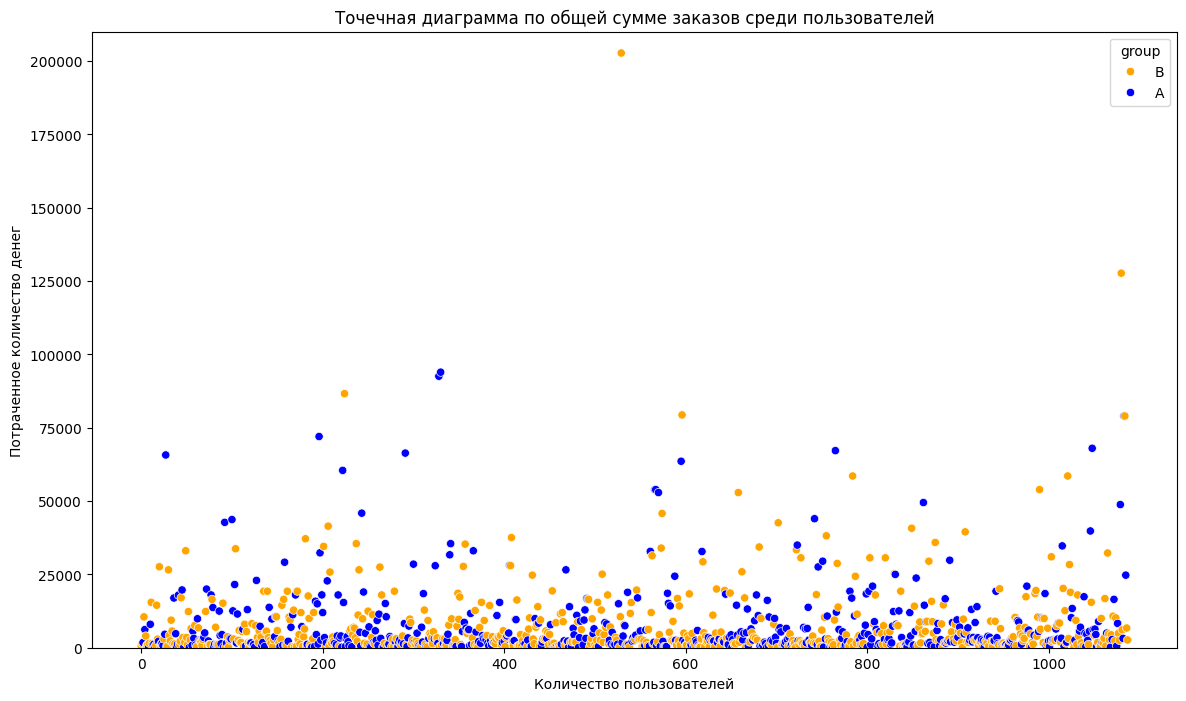

In [346]:
x_values = pd.Series(range(0,len(agg_orders_inf.users_id)))
fig, ax = plt.subplots(figsize=(14, 8))
custom_palette = {    "A": "blue",    "B": "orange"
}
plt.ylim(0,210000)
sns.scatterplot(data = agg_orders_inf, x = x_values, y = 'users_revenue', palette = custom_palette, hue = 'group',ax=ax)
ax.set_ylabel('Потраченное количество денег')
ax.set_xlabel('Количество пользователей')
plt.title('Точечная диаграмма по общей сумме заказов среди пользователей')

In [347]:
np.percentile(agg_orders_inf.users_revenue,99)

np.float64(66459.1999999999)

In [348]:
np.percentile(agg_orders_inf.users_revenue,95)

np.float64(31564.499999999956)

Общий чек на одного пользователя по 99 и 95 процентилю за период наблюдения 67285 и 32051 рублей
Эта сумма является максимальной для 99 и 95 процентов пользователей

In [349]:
np.percentile(agg_orders_inf[agg_orders_inf['group']=='A'].users_revenue,99)

np.float64(67173.20000000001)

In [350]:
np.percentile(agg_orders_inf[agg_orders_inf['group']=='A'].users_revenue,95)

np.float64(32763.09999999999)

95 и 99 процентиль общего чека для группы А

In [351]:
np.percentile(agg_orders_inf[agg_orders_inf['group']=='B'].users_revenue,99)

np.float64(58540.76)

In [352]:
np.percentile(agg_orders_inf[agg_orders_inf['group']=='B'].users_revenue,95)

np.float64(30649.0)

95 и 99 процентиль общего чека для группы B

Вывод: общий чек по 95 и 99 процентилю при удалении аномалий выше у группы А,при этом у группы B наблюдается аномалии
пользователей с высоким общим чеком это видно на точечной диаграмме

Text(0, 0.5, 'Количество')

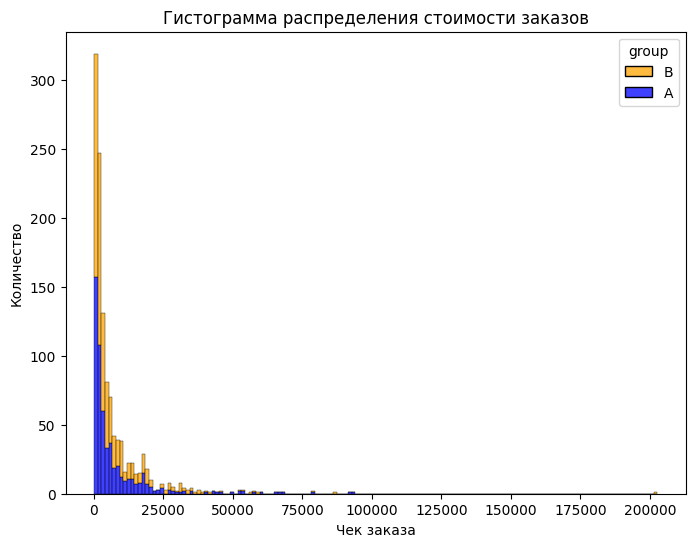

In [353]:
fig, ax = plt.subplots(figsize=(8, 6))
custom_palette = {    "A": "blue",    "B": "orange"
}
sns.histplot(data = orders, x = 'revenue', ax=ax, hue = 'group', multiple='stack',palette=custom_palette)
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Чек заказа')
plt.ylabel('Количество')


Этот график недостаточно информативен изменим его масштаб

(0.0, 100000.0)

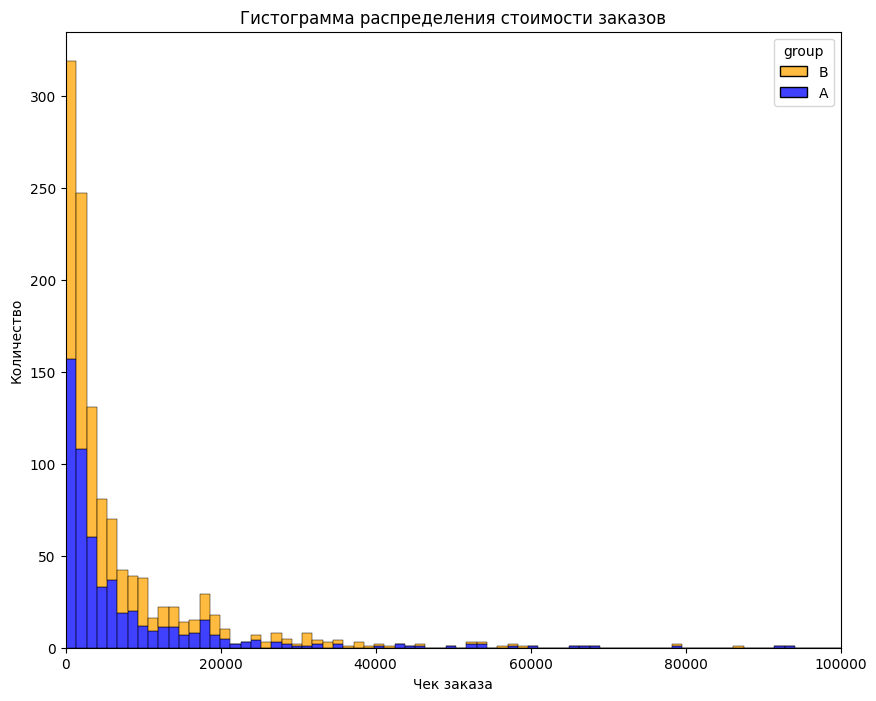

In [354]:
fig, ax = plt.subplots(figsize=(10, 8))
custom_palette = {    "A": "blue",    "B": "orange"
}
sns.histplot(data = orders, x = 'revenue', ax=ax, hue = 'group', multiple='stack',palette=custom_palette)
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Чек заказа')
plt.ylabel('Количество')
plt.xlim(0,100000)


In [355]:
np.percentile(orders.revenue,95)

np.float64(27696.25)

In [356]:
np.percentile(orders.revenue,99)

np.float64(58220.0)

Стоимость заказа по 99 и 95 процентилю за период наблюдения 58220 и 27696.25 рублей
Эта сумма является максимальной для 99 и 95 процентов всех пользователей

In [359]:
np.percentile(orders[orders['group']=='A'].revenue,99)

np.float64(62764.39999999969)

In [360]:
orders[orders['group']=='B'].revenue.median()

np.float64(2960.0)

In [361]:
np.percentile(orders[orders['group']=='B'].revenue,99)

np.float64(53522.48)

Text(0, 0.5, 'Количество')

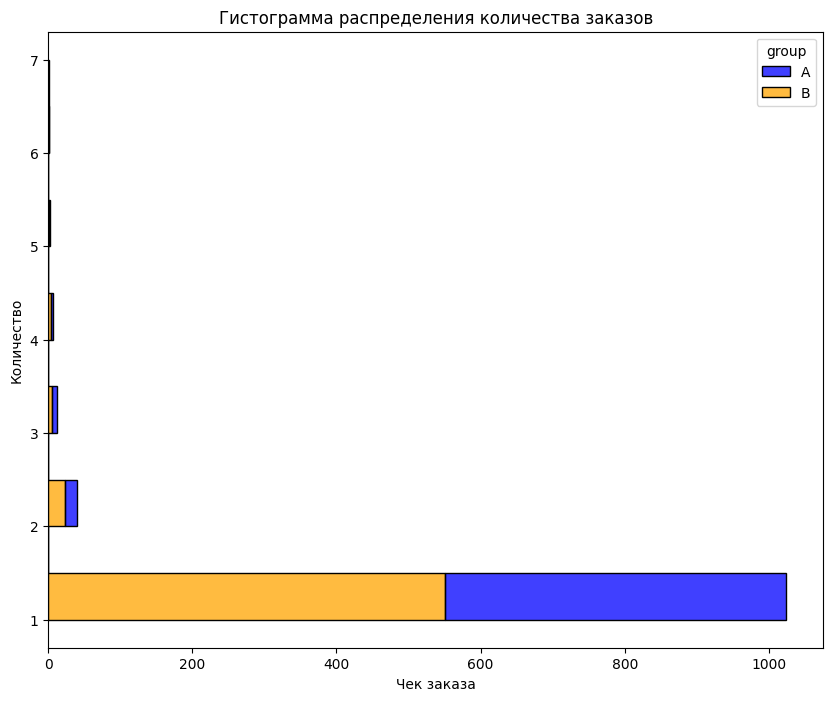

In [362]:
fig, ax = plt.subplots(figsize=(10, 8))
custom_palette = {    "A": "blue",    "B": "orange"
}
sns.histplot(data = agg_orders_inf, y = 'count_goods', ax=ax, hue = 'group', multiple='stack',palette=custom_palette)
plt.title('Гистограмма распределения количества заказов')
plt.xlabel('Чек заказа')
plt.ylabel('Количество')


In [363]:
np.percentile(agg_orders_inf.count_goods,95)

np.float64(2.0)

In [364]:
np.percentile(agg_orders_inf.count_goods,99)

np.float64(4.0)

Количество заказов по 99 и 95 процентилю за период наблюдения 4 и 2 заказа
Эта количество является максимальным для 99 и 95 процентов всех пользователей

Text(0.5, 1.0, 'Гистограмма распределение общего среднего чека на пользователя')

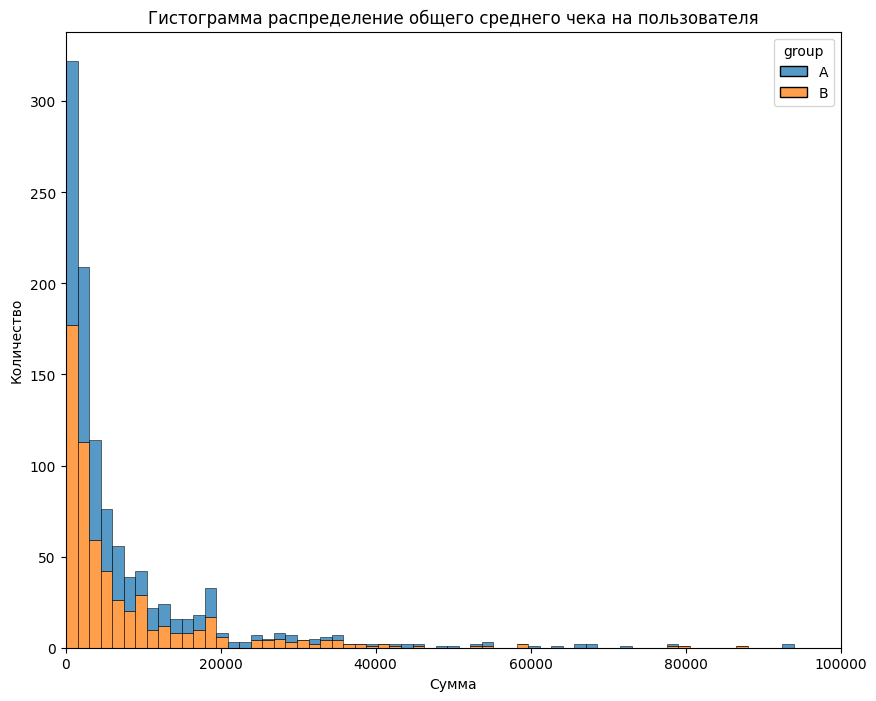

In [365]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.histplot(data = agg_orders_inf, x = 'users_revenue', hue='group', multiple = 'stack', ax = ax)
plt.xlim(0,100000)
plt.ylabel('Количество')
plt.xlabel('Сумма')
plt.title('Гистограмма распределение общего среднего чека на пользователя')

In [366]:
agg_orders_inf[agg_orders_inf['group']=='A'].users_revenue.median()

np.float64(3190.0)

In [367]:
agg_orders_inf[agg_orders_inf['group']=='B'].users_revenue.median()

np.float64(3070.0)

Общий средний чек для группы A и B, составил 3190 и 3070, у группы A он выше на 130 рублей

In [368]:
agg_orders_inf[agg_orders_inf['group']=='A'].users_revenue.mean()

np.float64(8120.880715705765)

In [369]:
agg_orders_inf[agg_orders_inf['group']=='B'].users_revenue.mean()

np.float64(7885.91452991453)

Общий средне-медианный чек на пользователя 
для группы A и B, составил 7785 и 8120,у группы A он выше на 335 рублей

In [370]:
from scipy.stats import mannwhitneyu

visits_group_A = a.visitors
visits_group_B = b.visitors

u_statistic, p_value = mannwhitneyu(visits_group_A, visits_group_B, alternative='two-sided')

# --- Вывод результатов ---
print(f"Тест Манна-Уитни:")
print(f"U-статистика = {u_statistic}")
print(f"P-значение = {p_value}")

# --- Интерпретация результатов ---
alpha = 0.05

print(f"\nУровень значимости alpha = {alpha}")

if p_value < alpha:
    print(f"P-значение {p_value:.4f} меньше alpha {alpha}.")
    print("Отвергаем нулевую гипотезу (H0). Есть статистически значимые доказательства того, что распределения количества посещений в двух группах различаются.")
    print("Это может означать, что в одной группе посещения имели тенденцию быть выше или ниже, чем в другой.")
else:
    print(f"P-значение {p_value:.4f} больше или равно alpha {alpha}.")
    print()
    print("Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что распределения количества посещений в двух группах различаются.")
    print("Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.")

Тест Манна-Уитни:
U-статистика = 455.5
P-значение = 0.7301376549390499

Уровень значимости alpha = 0.05
P-значение 0.7301 больше или равно alpha 0.05.

Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что распределения количества посещений в двух группах различаются.
Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.


In [371]:
from scipy.stats import mannwhitneyu

visits_group_A = agg_revenue_date[agg_revenue_date['group']=='A'].revenue
visits_group_B = agg_revenue_date[agg_revenue_date['group']=='B'].revenue

u_statistic, p_value = mannwhitneyu(visits_group_A, visits_group_B, alternative='two-sided')

# --- Вывод результатов ---
print(f"Тест Манна-Уитни:")
print(f"U-статистика = {u_statistic}")
print(f"P-значение = {p_value}")

# --- Интерпретация результатов ---
alpha = 0.05

print(f"\nУровень значимости alpha = {alpha}")

if p_value < alpha:
    print(f"P-значение {p_value:.4f} меньше alpha {alpha}.")
    print("Отвергаем нулевую гипотезу (H0). Есть статистически значимые доказательства того, что выручка в двух группах различаются.")
    print("Это может означать, что в одной группе посещения имели тенденцию быть выше или ниже, чем в другой.")
else:
    print(f"P-значение {p_value:.4f} больше или равно alpha {alpha}.")
    print()
    print("Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что выручка различается.")
    print("Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.")

Тест Манна-Уитни:
U-статистика = 369.0
P-значение = 0.11811807615280061

Уровень значимости alpha = 0.05
P-значение 0.1181 больше или равно alpha 0.05.

Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что выручка различается.
Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.


In [372]:
from scipy.stats import mannwhitneyu
agg_revenue_date
visits_group_A = agg_revenue_date[agg_revenue_date['group']=='A'].average_check
visits_group_B = agg_revenue_date[agg_revenue_date['group']=='B'].average_check

u_statistic, p_value = mannwhitneyu(visits_group_A, visits_group_B, alternative='two-sided')

# --- Вывод результатов ---
print(f"Тест Манна-Уитни:")
print(f"U-статистика = {u_statistic}")
print(f"P-значение = {p_value}")

# --- Интерпретация результатов ---
alpha = 0.05

print(f"\nУровень значимости alpha = {alpha}")

if p_value < alpha:
    print(f"P-значение {p_value:.4f} меньше alpha {alpha}.")
    print("Отвергаем нулевую гипотезу (H0). Есть статистически значимые доказательства того, что средний чек заказа в двух группах различаются.")
    print("Это может означать, что в одной группе посещения имели тенденцию быть выше или ниже, чем в другой.")
else:
    print(f"P-значение {p_value:.4f} больше или равно alpha {alpha}.")
    print()
    print("Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что средний чек заказа различается.")
    print("Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.")

Тест Манна-Уитни:
U-статистика = 435.0
P-значение = 0.5263838033664119

Уровень значимости alpha = 0.05
P-значение 0.5264 больше или равно alpha 0.05.

Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что средний чек заказа различается.
Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.


In [373]:
from scipy.stats import mannwhitneyu

visits_group_A = agg_orders_inf[agg_orders_inf['group']=='A'].users_revenue
visits_group_B = agg_orders_inf[agg_orders_inf['group']=='B'].users_revenue

u_statistic, p_value = mannwhitneyu(visits_group_A, visits_group_B, alternative='two-sided')

# --- Вывод результатов ---
print(f"Тест Манна-Уитни:")
print(f"U-статистика = {u_statistic}")
print(f"P-значение = {p_value}")

# --- Интерпретация результатов ---
alpha = 0.05

print(f"\nУровень значимости alpha = {alpha}")

if p_value < alpha:
    print(f"P-значение {p_value:.4f} меньше alpha {alpha}.")
    print("Отвергаем нулевую гипотезу (H0). Есть статистически значимые доказательства того, что общая сумма заказов на одного пользователя\
    в двух группах различаются.")
    print("Это может означать, что в одной группе посещения имели тенденцию быть выше или ниже, чем в другой.")
else:
    print(f"P-значение {p_value:.4f} больше или равно alpha {alpha}.")
    print()
    print("Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что общая сумма заказов на одного пользователя \
    различается.")
    print("Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.")

Тест Манна-Уитни:
U-статистика = 148502.0
P-значение = 0.7903228229221966

Уровень значимости alpha = 0.05
P-значение 0.7903 больше или равно alpha 0.05.

Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что общая сумма заказов на одного пользователя     различается.
Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.


In [374]:
from scipy.stats import mannwhitneyu

visits_group_A = agg_revenue_date[agg_revenue_date['group']=='A'].transactionid
visits_group_B = agg_revenue_date[agg_revenue_date['group']=='B'].transactionid

u_statistic, p_value = mannwhitneyu(visits_group_A, visits_group_B, alternative='two-sided')

# --- Вывод результатов ---
print(f"Тест Манна-Уитни:")
print(f"U-статистика = {u_statistic}")
print(f"P-значение = {p_value}")

# --- Интерпретация результатов ---
alpha = 0.05

print(f"\nУровень значимости alpha = {alpha}")

if p_value < alpha:
    print(f"P-значение {p_value:.4f} меньше alpha {alpha}.")
    print("Отвергаем нулевую гипотезу (H0). Есть статистически значимые доказательства того, что общее количество заказов\
    в двух группах различаются.")
    print("Это может означать, что в одной группе посещения имели тенденцию быть выше или ниже, чем в другой.")
else:
    print(f"P-значение {p_value:.4f} больше или равно alpha {alpha}.")
    print()
    print("Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что общее количество заказов  \
    различается.")
    print("Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.")

Тест Манна-Уитни:
U-статистика = 350.5
P-значение = 0.06729729111813958

Уровень значимости alpha = 0.05
P-значение 0.0673 больше или равно alpha 0.05.

Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что общее количество заказов      различается.
Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.


In [375]:
from scipy.stats import mannwhitneyu

visits_group_A = first_day_order[first_day_order['group'] == 'A'].visitorid
visits_group_B = first_day_order[first_day_order['group'] == 'B'].visitorid

u_statistic, p_value = mannwhitneyu(visits_group_A, visits_group_B, alternative='two-sided')

# --- Вывод результатов ---
print(f"Тест Манна-Уитни:")
print(f"U-статистика = {u_statistic}")
print(f"P-значение = {p_value}")

# --- Интерпретация результатов ---
alpha = 0.05

print(f"\nУровень значимости alpha = {alpha}")

if p_value < alpha:
    print(f"P-значение {p_value:.4f} меньше alpha {alpha}.")
    print("Отвергаем нулевую гипотезу (H0). Есть статистически значимые доказательства того, что количество уникальных пользователей\
    в двух группах различаются.")
    print("Это может означать, что в одной группе посещения имели тенденцию быть выше или ниже, чем в другой.")
else:
    print(f"P-значение {p_value:.4f} больше или равно alpha {alpha}.")
    print()
    print("Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что количество уникальных пользователей  \
    различается.")
    print("Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.")

Тест Манна-Уитни:
U-статистика = 347.5
P-значение = 0.061315166637301376

Уровень значимости alpha = 0.05
P-значение 0.0613 больше или равно alpha 0.05.

Не можем отвергнуть нулевую гипотезу (H0). У нас недостаточно статистически значимых доказательств того, что количество уникальных пользователей      различается.
Это не означает, что распределения абсолютно одинаковы, а лишь то, что наблюдаемое различие недостаточно велико для вывода о его статистической значимости.


Различия когорт по данным за время наблюдения:
- Количество уникальных пользователей в группе B превысила группу А на 16,5 %
- Выручка в группе B превысила группу А на 12,9 % с фильтрацией аномалии и 44,6 % без фильтрации
- Общее количество заказов в группе B была выше чем в группе А на 14,9 %
- Общий средний и средне-медианный чек на пользователя в группе А был выше чем в группе B на 3,90 % и 2,98 % соотвественно
- Средний чек на заказ в группе А был выше на 1,5% чем у группы B
- Общее количество посещений у группы B было выше на 1% чем группы A



Вывод: Времени наблюдения для утверждения о статистической значимости недостаточно
рекомендуется продолжить наблюдения для наблюдения динамики p-values,рекомендуемые
метрики для анализа: 
- Количество уникальных пользователей
- Общее количество заказов
- Выручка
